# 05 Unsupervised Learning

**Objective:**  
- Load the PCA-transformed dataset.  
- Apply clustering techniques:  
  1. KMeans Clustering  
  2. Hierarchical (Agglomerative) Clustering  
- Visualize clusters using the first 2 PCA components.  
- Evaluate clustering quality using Silhouette Score.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [3]:
# Load PCA dataset (created earlier in 02_pca_analysis)
df_pca = pd.read_csv("../data/heart_disease_pca.csv")

print("✅ PCA dataset loaded")
print(df_pca.shape)
df_pca.head()


✅ PCA dataset loaded
(299, 18)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,target
0,-0.879960,1.410819,-2.188063,-0.236190,0.300932,3.883199,-0.173901,-0.339137,-0.525330,0.276771,-0.241191,0.385452,0.657439,-0.402003,1.459492,-1.180547,0.226423,0
1,-2.607448,2.422246,-0.047766,-0.541594,-0.771920,-0.449755,-0.716330,-0.845852,-1.385021,-1.092911,0.108630,0.370029,-1.168044,0.555349,0.170075,1.299732,-1.282735,1
2,-3.432665,0.199008,-0.903539,0.661496,-0.946025,-0.680375,-0.989973,-0.136185,-0.781230,-0.504032,0.158952,-0.132913,-0.624857,0.221779,0.264527,-0.806823,-0.911499,1
3,1.403580,-0.049906,-0.440762,2.856759,-0.048205,0.673733,0.491707,0.827152,0.228858,0.573790,0.138892,0.649669,-0.280019,2.549955,1.258415,0.744264,0.326532,0
4,2.810559,0.226632,-0.236541,-0.206620,-1.964289,0.211362,-0.130660,0.306791,-0.012602,0.637739,-0.881323,0.760718,-0.990100,1.245361,-0.163315,-1.630147,0.024858,0


In [4]:
X = df_pca.drop(columns=["target"])
y = df_pca["target"]  # (we won’t use it for training, just for reference)

print("Features shape:", X.shape)


Features shape: (299, 17)


Silhouette Score (KMeans): 0.16168272646575554


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


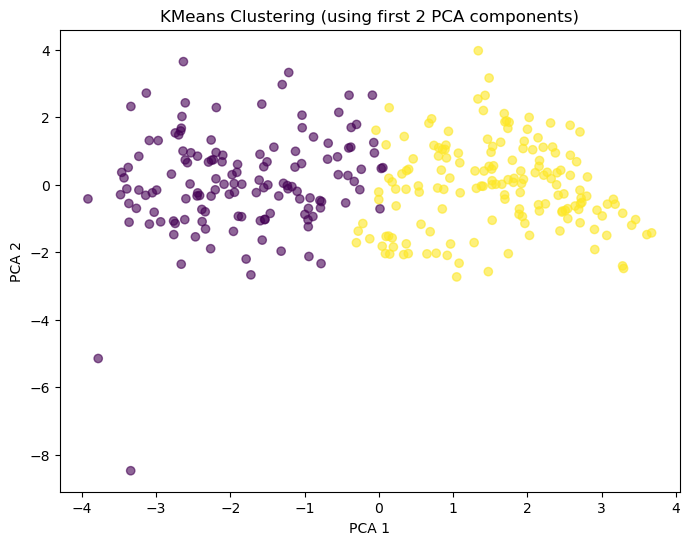

In [5]:
# Try KMeans with 2 clusters (healthy vs disease)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Evaluate clustering quality
silhouette_kmeans = silhouette_score(X, y_kmeans)
print("Silhouette Score (KMeans):", silhouette_kmeans)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap="viridis", alpha=0.6)
plt.title("KMeans Clustering (using first 2 PCA components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Silhouette Score (Hierarchical): 0.13191131830684455


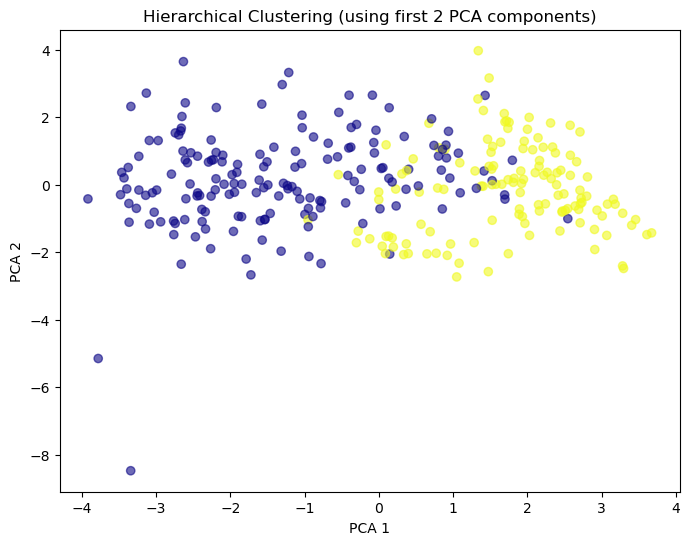

In [6]:
# Agglomerative (Hierarchical) Clustering
hier = AgglomerativeClustering(n_clusters=2)
y_hier = hier.fit_predict(X)

# Evaluate clustering
silhouette_hier = silhouette_score(X, y_hier)
print("Silhouette Score (Hierarchical):", silhouette_hier)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_hier, cmap="plasma", alpha=0.6)
plt.title("Hierarchical Clustering (using first 2 PCA components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [7]:
print("\n✅ Clustering Comparison:")
print(f"KMeans Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Hierarchical Silhouette Score: {silhouette_hier:.3f}")



✅ Clustering Comparison:
KMeans Silhouette Score: 0.162
Hierarchical Silhouette Score: 0.132


In [8]:
# Save results with cluster labels for future analysis
df_clusters = X.copy()
df_clusters["KMeans_Cluster"] = y_kmeans
df_clusters["Hierarchical_Cluster"] = y_hier
df_clusters["target"] = y

df_clusters.to_csv("../results/unsupervised_clusters.csv", index=False)

print("✅ Clustering results saved in ../results/unsupervised_clusters.csv")


✅ Clustering results saved in ../results/unsupervised_clusters.csv
